In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

C:\Users\toell\AppData\Local\Temp\ipykernel_21852\3822632653.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


The documentation on the site provides a nice way of filtering by column using bash:
`https://chess-research-project.readthedocs.io/en/latest/`

In [4]:
if os.getcwd().split('\\')[-1] != 'irl-chess':
    os.chdir('../')

In [36]:
def win_loss_translation(inp):
    if len(inp) < 2:        # What is a star??
        out = 0
    elif inp[0] == '0':       # White loss
        out = -1
    else:
        if inp[1] == '-':   # White win
            out = 1
        else:               # Draw
            out = 0
    return out
wl_options = ['1-0', '0-1', '1/2-1/2']
print([win_loss_translation(el) for el in wl_options])

[1, -1, 0]


In [55]:
path = 'data/35-million-chess-games-1998/all_with_filtered_annotations.txt'

games, data = [], []
i = 0

with open(path, 'r') as file:
    for line in tqdm(file.readlines()[6:], total=3561469):
        
        split_line = line.split('###')
        game = split_line[1]
        # w/l/d, w_ELO, b_ELO,
        game_data = split_line[0].split(' ')
        if game_data[3] != 'None' and game_data[4] != 'None':
            games.append([game])
            data.append([win_loss_translation(game_data[2]), *game_data[3:6]])
        i += 1


100%|██████████| 3561469/3561469 [00:26<00:00, 136640.49it/s]


In [56]:
data_array = np.array(data, dtype=np.int8)

In [58]:
sum(data_array[:, 1] > 500)

0

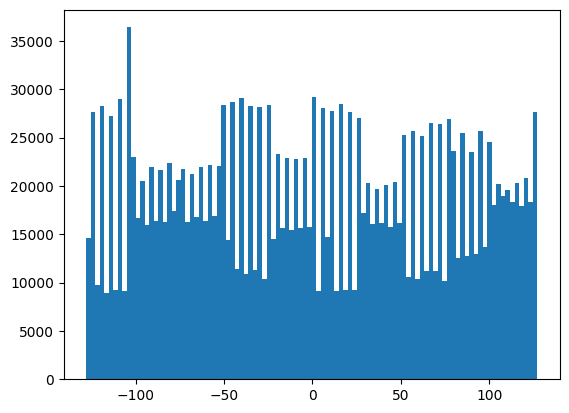

In [60]:
plt.hist(data_array[:, 2], bins=100)
plt.show()